In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# read data

life_expectancy_at_birth_df = pd.read_csv("DataSets/complete_dataset.csv")
life_expectancy_at_birth_df

,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years
0,AT,2008,F,Y50-54,TOTAL,279.9,Austria,83.3
1,AT,2008,F,Y15-74,ED0-2,1019.0,Austria,83.3
2,AT,2008,F,Y45-49,ED5-8,48.9,Austria,83.3
3,AT,2008,F,Y30-34,ED0-2,43.0,Austria,83.3
4,AT,2008,F,Y50-74,ED3_4,568.7,Austria,83.3
...,...,...,...,...,...,...,...,...
78409,UK,2018,M,Y25-74,TOTAL,20099.7,United Kingdom,79.5
78410,UK,2018,M,Y50-54,ED0-2,571.4,United Kingdom,79.5
78411,UK,2018,M,Y65-69,ED5-8,523.7,United Kingdom,79.5
78412,UK,2018,M,Y30-34,ED0-2,360.9,United Kingdom,79.5


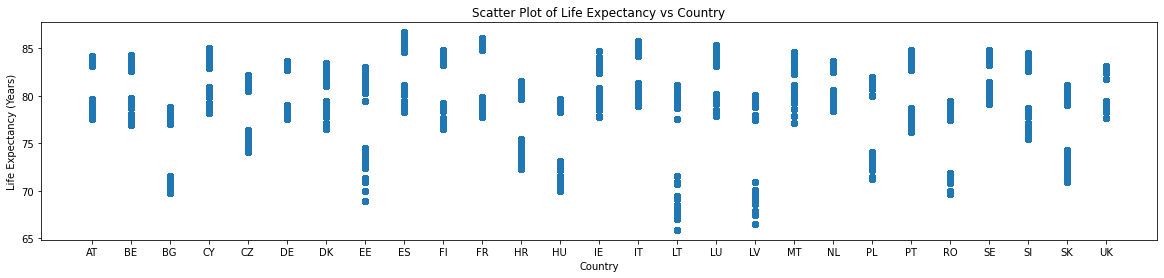

In [3]:
# Scatter Plot

# may should use conditional instead of groupby

plt.figure(figsize=(20,4))
plt.scatter(life_expectancy_at_birth_df['geography'], life_expectancy_at_birth_df['Life_expectancy_in_years'])
plt.title("Scatter Plot of Life Expectancy vs Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")

plt.show()

In [18]:
filtered_life_expectancy_at_birth_df = life_expectancy_at_birth_df.query('date == 2010')

filter_life_expectancy_at_birth_df = filtered_life_expectancy_at_birth_df.sex.str.contains('F')

filtered_life_expectancy_at_birth_df[filter_life_expectancy_at_birth_df]

,geography,date,sex,age,isced11,Population_in_thousands,Country_Name,Life_expectancy_in_years
460,AT,2010,F,Y15-19,TOTAL,241.1,Austria,83.5
461,AT,2010,F,Y50-54,TOTAL,299.7,Austria,83.5
462,AT,2010,F,Y15-39,ED5-8,200.0,Austria,83.5
463,AT,2010,F,Y65-69,ED3_4,123.6,Austria,83.5
464,AT,2010,F,Y25-29,ED3_4,181.6,Austria,83.5
...,...,...,...,...,...,...,...,...
75970,UK,2010,F,Y35-39,ED0-2,438.6,United Kingdom,82.6
75971,UK,2010,F,Y40-59,ED3_4,3157.0,United Kingdom,82.6
75972,UK,2010,F,Y50-54,ED3_4,736.1,United Kingdom,82.6
75973,UK,2010,F,Y40-64,ED5-8,3226.9,United Kingdom,82.6


In [8]:
# Histogram Plot

# may should use conditional instead of groupby


plt.figure(figsize=(20,4))
plt.bar(life_expectancy_at_birth_df['geography'], life_expectancy_at_birth_df['Life_expectancy_in_years'])

plt.title("Histogram of Life Expectancy vs Country")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Years)")
plt.show()

KeyboardInterrupt: 

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# Scatter Plot

# may should use conditional instead of groupby

plt.figure(figsize=(20,4))
plt.scatter(life_expectancy_at_birth_df['date'], life_expectancy_at_birth_df['value'])
plt.title("Scatter Plot of Life Expectancy vs Year")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")


# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(life_expectancy_at_birth_df['date'], life_expectancy_at_birth_df['value'])
# Print the correlation coefficient
print(f"The correlation between Life Expectancy vs Country is {round(rvalue, 2)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * life_expectancy_at_birth_df['date'] + intercept
plt.plot(life_expectancy_at_birth_df['date'],tv_vs_wt_fit,'-', color='r');

plt.show()